## Import Library

In [1]:
import pymongo
import pandas as pd
from random import shuffle
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook

## Load Data From MongoDB

In [2]:
# Load data dari Database MongoDB 
myClient = pymongo.MongoClient("mongodb://localhost:27017")
myDatabase = myClient.iStorage
myCollection = myDatabase.iDataset

In [3]:
# 7 kategori artikel berita yang ada di dalam database
categories = ['news', 'bisnis', 'sports', 'entertainment', 'tekno', 'otomotif', 'health']

In [4]:
# Array yang digunakan untuk menampung data berdasarkan kategori
polhukam,bisnis,olahraga,hiburan,teknologi,otomotif,kesehatan = [],[],[],[],[],[],[]

In [5]:
# fungsi ambil data berdasarkan category
def getQuery(category=None):
    iQuery = myCollection.find(
        {"category": "{}".format(category)}, 
        {
            "category": 1, 
            "title": 1,
            "url": 1,
            "cleanContent": 1
        }).limit(15000)
    
    return iQuery

In [6]:
# fungsi input data ke list
def setData(iQuery=None):
    category = []
    for query in iQuery: category.append(query)
        
    return category

In [7]:
iData = []

In [8]:
# Ambil data dari Database dan disimpan di array berdasarkan kategori
####################################
iQuery = getQuery("news")
polhukam = setData(iQuery)
for data in tqdm(polhukam): iData.append(data)
####################################
iQuery = getQuery("bisnis")
bisnis = setData(iQuery)
for data in tqdm(bisnis): iData.append(data)
####################################
iQuery = getQuery("sports")
olahraga = setData(iQuery)
for data in tqdm(olahraga): iData.append(data)
####################################
iQuery = getQuery("entertainment")
hiburan = setData(iQuery)
for data in tqdm(hiburan): iData.append(data)
####################################
iQuery = getQuery("tekno")
teknologi = setData(iQuery)
for data in tqdm(teknologi): iData.append(data)
####################################
iQuery = getQuery("otomotif")
otomotif = setData(iQuery)
for data in tqdm(otomotif): iData.append(data)
####################################
iQuery = getQuery("health")
kesehatan = setData(iQuery)
for data in tqdm(kesehatan): iData.append(data)

100%|██████████| 15000/15000 [00:00<00:00, 2942820.52it/s]


In [9]:
# Dataframe Categories
df = pd.DataFrame({
    'Nama Kategori':[
        'Polhukam','Bisnis','Olahraga','Hiburan','Teknologi','Otomotif','Kesehatan'],
    'Jumlah Data':[
        len(polhukam),
        len(bisnis),
        len(olahraga),
        len(hiburan),
        len(teknologi),
        len(otomotif),
        len(kesehatan)
    ]
})
df.loc['Total'] = pd.Series(df['Jumlah Data'].sum(), index = ['Jumlah Data'])
df

,Nama Kategori,Jumlah Data
0,Polhukam,15000.0
1,Bisnis,15000.0
2,Olahraga,15000.0
3,Hiburan,15000.0
4,Teknologi,15000.0
5,Otomotif,15000.0
6,Kesehatan,15000.0
Total,NaN,105000.0


## Konversi Data ke DataFrame (Pandas)

In [10]:
shuffle(iData)

In [11]:
df = pd.DataFrame(iData)

In [12]:
df.tail()

,_id,category,title,url,cleanContent
104995,5d6f5493e8471817077058e8,entertainment,"Hilda Vitria Temperamental, Kriss Hatta Mengak...",https://seleb.tempo.co/read/1073788/hilda-vitr...,kriss hatta hilda vitria khan istrinya kabur r...
104996,5dad47b8f071bac3d05d0ec8,tekno,Peneliti Keamanan Ini Batal Umbar Cara Bobol K...,https://www.liputan6.com/tekno/read/3862932/pe...,peneliti keamanan siber wish wu dilaporkan bat...
104997,5d6e33357857a70f2f87b16c,sports,"Kejuaraan Dunia: Greysia / Apriyani Lolos, Del...",https://sport.tempo.co/read/1239209/kejuaraan-...,indonesia menyisakan wakilnya nomor ganda putr...
104998,5d6b703a4d262d12b792a1d3,sports,"Persija Jakarta Vs Binh Duong, Kolev Antisipas...",https://bola.tempo.co/read/1179396/persija-jak...,pelatih persija jakarta ivan kolev timnya meng...
104999,5dd049b794658b66f52ec59d,tekno,"Console Nintendo Switch Dijual Maret 2017, Beb...",https://tekno.tempo.co/read/835938/console-nin...,nintendo resmi umum jual console game baru nin...


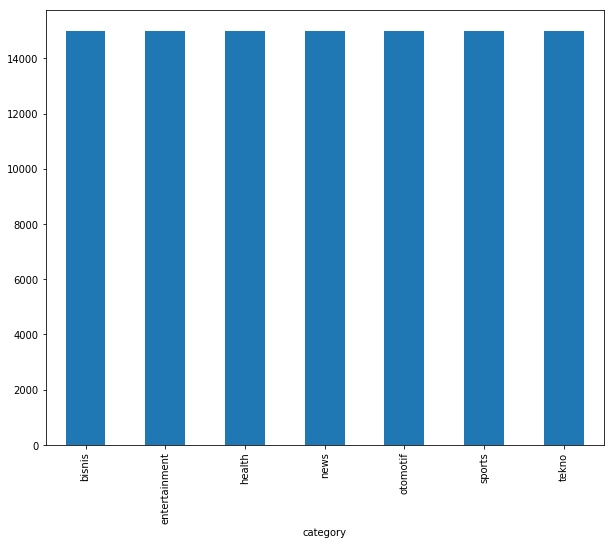

In [13]:
fig = plt.figure(figsize=(10,8))
df.groupby('category').title.count().plot.bar(ylim=0)
plt.show()

## Menggunakan Metode Naive Bayes

In [44]:
import textacy
import seaborn as sns; sns.set()
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from textacy.preprocess import preprocess_text
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Create Pipeline MNB

In [16]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

### Split Dataset

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df['cleanContent'], df['category'], test_size=0.1)

In [40]:
print('X_traint : {}'.format(len(X1_train)))
print('X_test   : {}'.format(len(X1_test)))
print('Total    : {}'.format(len(X1_train) + len(X1_test)))

X_traint : 94500
X_test   : 10500
Total    : 105000


### Use MNB

In [24]:
nb.fit(X1_train, y1_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Score Model MNB

In [84]:
# Calculate the accuracy score and predict target values
score = nb.score(X1_train, y1_train)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 96.67 %


In [26]:
print(nb.score(X1_train, y1_train))

0.9666984126984127


In [28]:
y_pred = nb.predict(X1_test)

In [32]:
nb.predict([preprocess_text(new_title, lowercase=True)])[0]

'news'

## Confusion Matrix MNB

In [34]:
print("Table Confusion Matrix")
print("=========================\n")
print('Accuracy %s' % accuracy_score(y_pred, y1_test))
print('=========================\n')
print(classification_report(y1_test, y_pred,target_names=categories))

Table Confusion Matrix

Accuracy 0.956952380952381

               precision    recall  f1-score   support

         news       0.92      0.96      0.94      1494
       bisnis       0.95      0.98      0.96      1489
       sports       0.96      0.93      0.94      1531
entertainment       0.93      0.97      0.95      1502
        tekno       0.98      0.96      0.97      1515
     otomotif       0.99      0.97      0.98      1482
       health       0.98      0.93      0.95      1487

  avg / total       0.96      0.96      0.96     10500



## Visualization with SNS.Heatmap

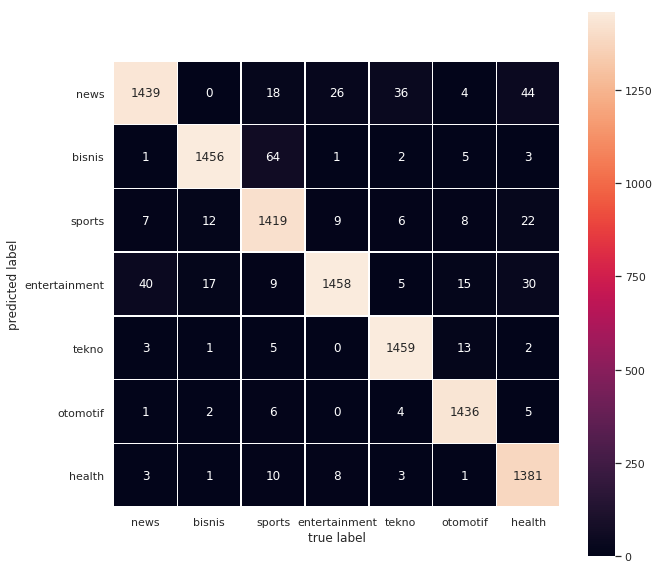

In [45]:
mat = confusion_matrix(y1_test, y_pred)
f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,linewidths=.6, ax=ax,
            xticklabels=categories, yticklabels=categories)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [54]:
def get_categoryMNB(text):
    result_cleanText = textacy.preprocess_text(text,lowercase=True,no_urls=True,no_numbers=True,no_punct=True)
    hasil_prediksi = nb.predict([result_cleanText])
    return hasil_prediksi

In [55]:
new_title = '''Arifin Ilham Sakit, Ini 7 Tips Bantuan Saat Kerabat Sakit'''

## Pengujian

In [58]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textacy.preprocess import preprocess_text
from IPython.core.display import HTML
from IPython.display import Image
from bs4 import BeautifulSoup
import requests
import id_aldo

In [59]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [60]:
# Load Model id_aldo
nlp = id_aldo.load()

stopwords = requests.get("https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt").text.split("\n")


In [61]:
class Pengujian():
    
    def __init__(self):
        self
        
    def nerText(self, text=None):
        doc = nlp(text)
        count = 0
        for ent in doc.ents:
            if ent.end <= 5:
                count = ent.end_char + 1
            else:
                count = len(text)

        iResult = text[count:].strip()

        return iResult
        
    def tempoArticle(self, link=None):
        iData, text_stopword, tempCF = [],[],[]
        formatCF = ['url', 'number', 'usd', 'email']
        
        response = requests.get(link).text
        soup = BeautifulSoup(response, "html5lib")
        title = soup.select_one('article > h1').text.strip()
        image = soup.select_one('figure > a')['href']
        contents = soup.select('#isi > p')
        
        for content in contents:
            if content.text.strip()[:10] != 'Baca juga:' and content.text.strip()[:5] != 'Baca:':
                iData.append(content.text.strip() + '\n\n')

        articles = ''.join(iData)
        format = self.nerText(articles)
        caseFolding = preprocess_text(format, fix_unicode=True, lowercase=True, no_urls=True,no_emails=True,
                                no_phone_numbers=True,no_numbers=True,no_currency_symbols=True,no_punct=True)
        caseFolding = caseFolding.split()
        [tempCF.append(cf) for cf in caseFolding if cf not in formatCF]
        caseFolding = ' '.join(tempCF)

        stopword = caseFolding.split()
        [text_stopword.append(st) for st in stopword if st not in stopwords]
        stopword = ' '.join(text_stopword)

        stemming = stemmer.stem(stopword)

        json = {
            'title' : title,
            'image' : image,
            'article' : articles,
            'source' : 'Tempo',
            'caseFolding' : caseFolding,
            'stopword' : stopword,
            'stemming' : stemming
        }

        return json
    
    def kompasArticle(self, link=None):
        iData, text_stopword, tempCF = [],[],[]
        formatCF = ['url', 'number', 'usd', 'email']

        response = requests.get(link).text
        soup = BeautifulSoup(response, "html5lib")
        # if link.split('.')[0].split('//')[1] == 'money'

        title = soup.select_one('.read__title').text.strip()
        image = soup.select_one('.photo > img')['data-src']
        contents = soup.select('.read__content > p')

        for i in range(len(contents)):
            if contents[i].text != '':
                if (contents[i].text[:9] != 'Baca juga' and contents[i].text[:5] != 'Baca:') \
                        and (contents[i].text[:15] != 'We are thrilled') and (contents[i].text[:6] != 'Flinke') \
                        and (contents[i].text[:18] != 'Baca selengkapnya:') and (contents[i].text[:25]) != 'Baca berita selengkapnya:' \
                        and (contents[i].text[:7]) != 'Sumber:':
                    iData.append(contents[i].text  + '\n\n')

        articles = ''.join(iData)
        format = self.nerText(articles)
        caseFolding = preprocess_text(format, fix_unicode=True, lowercase=True, no_urls=True,no_emails=True,
                                no_phone_numbers=True,no_numbers=True,no_currency_symbols=True,no_punct=True)
        caseFolding = caseFolding.split()
        [tempCF.append(cf) for cf in caseFolding if cf not in formatCF]
        caseFolding = ' '.join(tempCF)

        stopword = caseFolding.split()
        [text_stopword.append(st) for st in stopword if st not in stopwords]
        stopword = ' '.join(text_stopword)

        stemming = stemmer.stem(stopword)

        json = {
            'title' : title,
            'image' : image,
            'article' : articles,
            'source' : 'Kompas',
            'caseFolding' : caseFolding,
            'stopword' : stopword,
            'stemming' : stemming
        }

        return json
    
    def testing(self, link=None):
        if link.split('.')[1] == 'tempo': result = self.tempoArticle(link)
        elif link.split('.')[1] == 'kompas': result = self.kompasArticle(link)
                
        return result

## Pengujian 1

In [62]:
uji = Pengujian()

In [63]:
url = '''https://cantik.tempo.co/read/1283802/depresi-tak-hanya-pengaruhi-otak-dan-tubuh-tapi-juga-mimpi-buruk'''

In [64]:
hasil = uji.testing(url)

In [67]:
hasil_prediksi = nb.predict([hasil['stemming']])

In [68]:
print()
print('Hasil Pengujian')
print('============================')
print('Judul Berita : ' + hasil['title'] + '\n')
print('Hasil Kategori ')
print('============================')
print(hasil_prediksi)
Image(url= hasil['image'], width=500, height=500)


Hasil Pengujian
Judul Berita : Depresi Tak Hanya Pengaruhi Otak dan Tubuh, Tapi Juga Mimpi Buruk

Hasil Kategori 
['health']


## Pengujian 2

In [72]:
def loopTest(url=None):
    uji = Pengujian()
    hasil = uji.testing(url)
    hasil_prediksi = nb.predict([hasil['stemming']])
    print()
    print('Hasil Pengujian')
    print('============================')
    print('Judul Berita : ' + hasil['title'] + '\n')
    print('Hasil Kategori ')
    print('============================')
    print(hasil_prediksi)

In [71]:
listUrl = []
for i in range(3):
    inputUrl = input(' Input URL : ')
    listUrl.append(inputUrl)
    
for lu in listUrl: loopTest(lu)

 Input URL : https://bisnis.tempo.co/read/1283729/defisit-bpjs-kesehatan-hingga-akhir-tahun-diprediksi-tembus-16-t
 Input URL : https://bola.tempo.co/read/1283820/hasil-liga-inggris-liverpool-vs-watford-2-0-salah-borong-2-gol
 Input URL : https://otomotif.tempo.co/read/1283572/skuter-matik-qooder-dibanderol-rp-357-juta-sudah-dipesan-16-unit

Hasil Pengujian
Judul Berita : Defisit BPJS Kesehatan Hingga Akhir Tahun Diprediksi Tembus 16 T

Hasil Kategori 
['bisnis']

Hasil Pengujian
Judul Berita : Hasil Liga Inggris: Liverpool vs Watford 2-0, Salah Borong 2 Gol

Hasil Kategori 
['sports']

Hasil Pengujian
Judul Berita : Skuter Matik Qooder Dibanderol Rp 357 Juta, Sudah Dipesan 16 Unit

Hasil Kategori 
['otomotif']


## Save Model Naive Bayes MultinomialNB

In [37]:
import pickle

In [50]:
pkl_filename = 'modelMNB.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(modelMNB, file)

In [51]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [54]:
# Calculate the accuracy score and predict target values
score = pickle_model.score(X1, y_train)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X1)

Test score: 91.58 %


In [55]:
def get_categoryMNB(text):
    result_cleanText = textacy.preprocess_text(text,lowercase=True,no_urls=True,no_numbers=True,no_punct=True)
    hasil_prediksi = pickle_model.predict(tfidf.transform([result_cleanText]))
    return hasil_prediksi

In [56]:
title = '''Waspadalah, Stroke Kini Sudah Menyerang Orang Usia 30-an'''

In [59]:
print(get_categoryMNB(title)[0])

health


## Save Model with Joblib

In [47]:
from sklearn.externals import joblib

In [50]:
joblib.dump(nb, 'modelMNB')

['modelMNB']

In [51]:
mj = joblib.load('modelMNB')

In [52]:
mj.score(X1_train, y1_train)

0.9666984126984127

In [73]:
# Calculate the accuracy score and predict target values
score = mj.score(X1_train, y1_train)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 96.67 %


In [30]:
new_title = 'Novel Baswedan: Ini Janji Kelima Jokowi, Saya Ngomong Apa Lagi?'

In [42]:
def get_categoryMNB(text):
    result_cleanText = textacy.preprocess_text(text,lowercase=True,no_urls=True,no_numbers=True,no_punct=True)
    hasil_prediksi = mj.predict(tfidf.transform([result_cleanText]))
    return hasil_prediksi

In [46]:
clean = preprocess_text(new_title, lowercase=True)
result = mj.predict([clean])
result[0]

'news'

## Testing

In [75]:
import requests
from bs4 import BeautifulSoup

In [76]:
url = '''https://newsapi.org/v2/top-headlines?country=id&apiKey=3bb4bf323f7f43d3aaafb6bd5cd26c92'''

In [77]:
response = requests.get(url).json()

In [78]:
response

{'status': 'ok',
 'totalResults': 38,
 'articles': [{'source': {'id': None, 'name': 'Bolasport.com'},
   'author': 'Lariza Oky Adisty',
   'title': 'Rekap BWF World Tour Finals 2019 - Dua Wakil Indonesia ke Final - Bolasport.com',
   'description': 'Dua wakil Indonesia melaju ke babak final BWF World Tour Finals 2019 dari nomor tunggal putra dan ganda putra.',
   'url': 'https://www.bolasport.com/read/311953883/rekap-bwf-world-tour-finals-2019-dua-wakil-indonesia-ke-final',
   'urlToImage': 'https://asset-a.grid.id/crop/0x0:0x0/700x465/photo/2019/12/14/3544551964.jpeg',
   'publishedAt': '2019-12-14T16:05:00Z',
   'content': 'BOLASPORT.COM - Rangkaian laga semifinal BWF World Tour Finals 2019 yang berlangsung di Tianhe Gymnasium, Guangzhou, China, Sabtu (14/12/2019), telah berakhir dan\xa0Indonesia berhasil menempatkan dua wakil ke babak final.\r\nSkuad\xa0Merah Putih menjaga asa meraih g… [+843 chars]'},
  {'source': {'id': None, 'name': 'Cianjurtoday.com'},
   'author': 'cianjurtoday

In [79]:
temp = []
for r in response['articles']:
    print(r['source'])
    temp.append(r)

{'id': None, 'name': 'Bolasport.com'}
{'id': None, 'name': 'Cianjurtoday.com'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Okezone.com'}
{'id': None, 'name': 'Tempo.co'}
{'id': None, 'name': 'Merdeka.com'}
{'id': None, 'name': 'Jawapos.com'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Cnnindonesia.com'}
{'id': None, 'name': 'Bisnis.com'}
{'id': None, 'name': 'Cnbcindonesia.com'}
{'id': None, 'name': 'Youtube.com'}
{'id': None, 'name': 'Tempo.co'}
{'id': None, 'name': 'Kabar.news'}
{'id': None, 'name': 'Suara.com'}
{'id': None, 'name': 'Harapanrakyat.com'}
{'id': None, 'name': 'Suara.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Detik.com'}


In [80]:
temp

[{'source': {'id': None, 'name': 'Bolasport.com'},
  'author': 'Lariza Oky Adisty',
  'title': 'Rekap BWF World Tour Finals 2019 - Dua Wakil Indonesia ke Final - Bolasport.com',
  'description': 'Dua wakil Indonesia melaju ke babak final BWF World Tour Finals 2019 dari nomor tunggal putra dan ganda putra.',
  'url': 'https://www.bolasport.com/read/311953883/rekap-bwf-world-tour-finals-2019-dua-wakil-indonesia-ke-final',
  'urlToImage': 'https://asset-a.grid.id/crop/0x0:0x0/700x465/photo/2019/12/14/3544551964.jpeg',
  'publishedAt': '2019-12-14T16:05:00Z',
  'content': 'BOLASPORT.COM - Rangkaian laga semifinal BWF World Tour Finals 2019 yang berlangsung di Tianhe Gymnasium, Guangzhou, China, Sabtu (14/12/2019), telah berakhir dan\xa0Indonesia berhasil menempatkan dua wakil ke babak final.\r\nSkuad\xa0Merah Putih menjaga asa meraih g… [+843 chars]'},
 {'source': {'id': None, 'name': 'Cianjurtoday.com'},
  'author': 'cianjurtoday.com',
  'title': 'X Series, Xbox Rasa PC Gaming - Cianjur T

In [82]:
for t in temp:
    print(t['title'])
    print(t['url'])
    print('=========================\n')
    print(get_categoryMNB(t['title']))
    print('=========================\n')

Rekap BWF World Tour Finals 2019 - Dua Wakil Indonesia ke Final - Bolasport.com
https://www.bolasport.com/read/311953883/rekap-bwf-world-tour-finals-2019-dua-wakil-indonesia-ke-final

['sports']

X Series, Xbox Rasa PC Gaming - Cianjur Today
https://cianjurtoday.com/x-series-xbox-rasa-pc-gaming/

['tekno']

Penting! Mau Jajal Tol Japek Layang Baca Dulu 3 Hal Ini - detikFinance
https://finance.detik.com/infrastruktur/d-4823048/penting-mau-jajal-tol-japek-layang-baca-dulu-3-hal-ini

['bisnis']

Dwigol Salah Antar Liverpool Benamkan Watford di Dasar Klasemen - Okezone
https://bola.okezone.com/read/2019/12/14/45/2141995/dwigol-salah-antar-liverpool-benamkan-watford-di-dasar-klasemen

['sports']

Tanggapi Edhy, Susi: Apa Kita Harus Pikirkan Petambak Vietnam? - Cek Fakta Tempo
https://bisnis.tempo.co/read/1283818/tanggapi-edhy-susi-apa-kita-harus-pikirkan-petambak-vietnam

['bisnis']

Pre Order Kedua Samsung Galaxy Fold Dibuka Minggu Besok | merdeka.com - merdeka.com
https://www.merdeka.com/